In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin, cos
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.1'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'
%matplotlib notebook

In [10]:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
u, v = np.meshgrid(u, v)

x = np.ravel(np.sin(v) * np.cos(u))
y = np.ravel(np.sin(v) * np.sin(u))
z = np.ravel(np.cos(v)) 

circle_coords = np.c_[x, y, z]

<IPython.core.display.Javascript object>


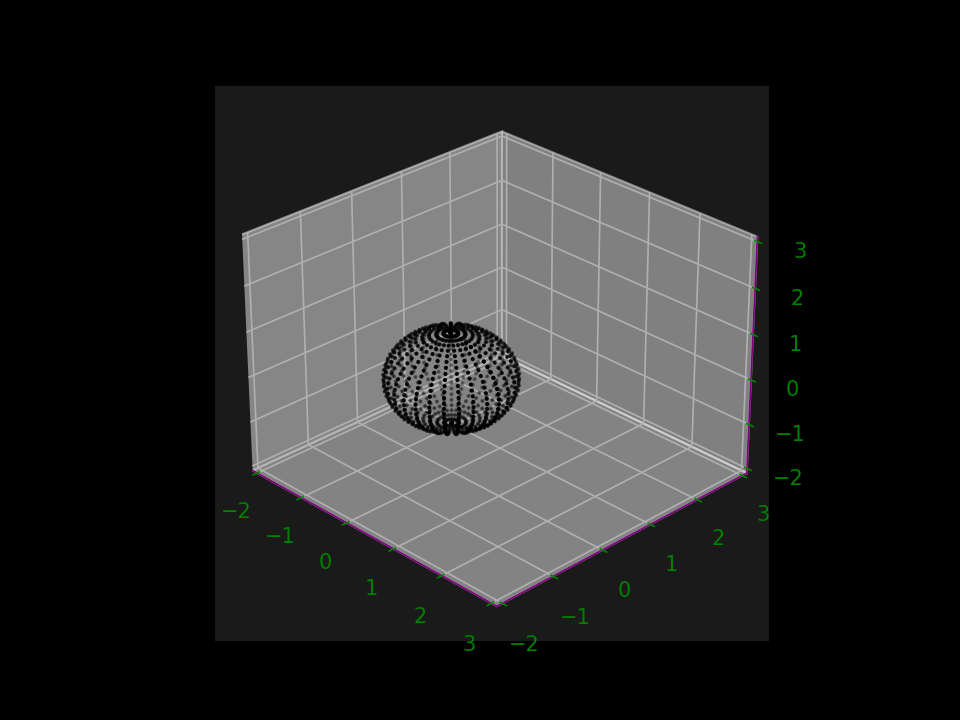

(-2.0, 3.0)

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(circle_coords[:, 0],
           circle_coords[:, 1],
           circle_coords[:, 2], s=1, c='black')

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_zlim(-2, 3)

In [12]:
def scale_object_coords(coords, scale_factor):
    _4d_coords = np.c_[circle_coords, np.ones(circle_coords.shape[0])]
    s = scale_factor
    scaleM = np.array([[s, 0, 0, 0],
                       [0, s, 0, 0],
                       [0, 0, s, 0],
                       [0, 0, 0, 1]])
    return (scaleM @ _4d_coords.T).T[:, :3]

In [13]:
scaled_circle_coords = scale_object_coords(circle_coords, 2)

<IPython.core.display.Javascript object>


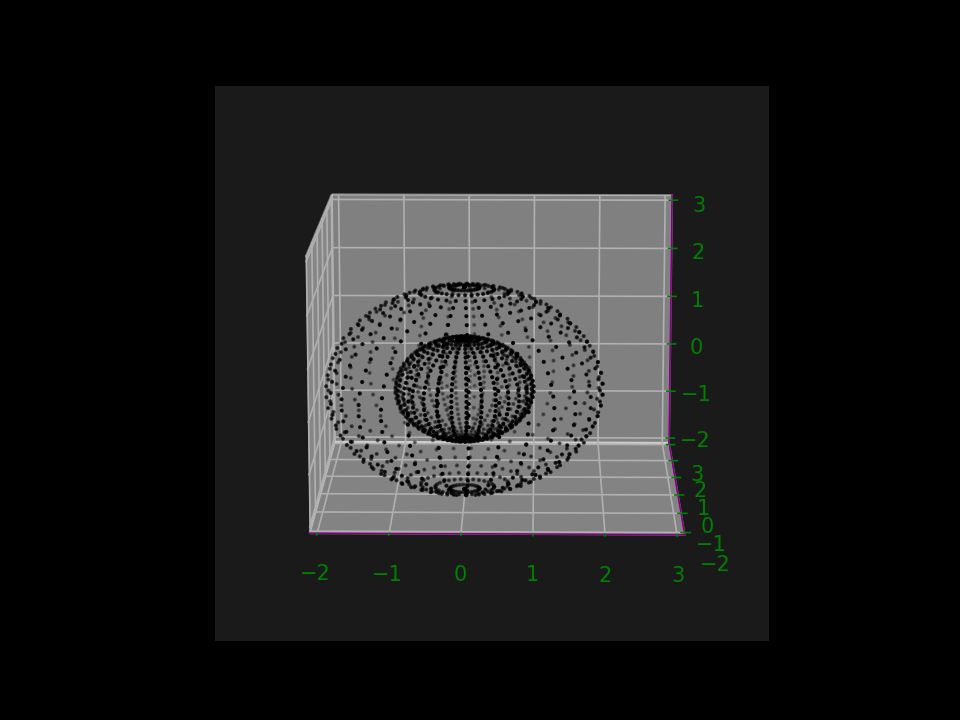

(-2.0, 3.0)

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_circle_coords[:, 0],
           scaled_circle_coords[:, 1],
           scaled_circle_coords[:, 2], s=1, c='black')

ax.scatter(circle_coords[:, 0],
           circle_coords[:, 1],
           circle_coords[:, 2], s=1, c='black')

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_zlim(-2, 3)

In [97]:
def transform_coords(coords, rotate_angles, translate_coords, scale_factor):
    _4d_coords = np.c_[circle_coords, np.ones(circle_coords.shape[0])]
    s = scale_factor
    tx, ty, tz = translate_coords
    a_x, a_y, a_z = rotate_angles

    
    rotate_X = np.array([[1, 0, 0, 0],
                         [0, cos(a_x),-sin(a_x), 0],
                         [0, sin(a_x), cos(a_x), 0],
                         [0, 0, 0, 1]])
    
    rotate_Y = np.array([[cos(a_y), 0, sin(a_y), 0],
                         [0, 1, 0, 0],
                         [-sin(a_y), 0, cos(a_y), 0],
                         [0, 0, 0, 1]])
    
    rotate_Z = np.array([[cos(a_z),-sin(a_z), 0, 0],
                         [sin(a_z), cos(a_z), 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])
    
    scaleM = np.array([[s, 0, 0, 0],
                       [0, s, 0, 0],
                       [0, 0, s, 0],
                       [0, 0, 0, 1]])
    
    translateM = np.array([[1, 0, 0, tx],
                           [0, 1, 0, ty],
                           [0, 0, 1, tz],
                           [0, 0, 0, 1]])
    
    rotate_XYZ = rotate_X @ rotate_Y @ rotate_Z 
    
    transformationM = scaleM @ translateM @ rotate_XYZ 
    
    return (transformationM @ _4d_coords.T).T[:, :3]

In [98]:
transformed_circle_coords = transform_coords(circle_coords, (.7, .7, .7), (1, 1, 1), 1.5)
transformed_circle_coords2 = transform_coords(circle_coords, (1.7, 1.7, 1.7), (3, 2, -1), .8)

<IPython.core.display.Javascript object>


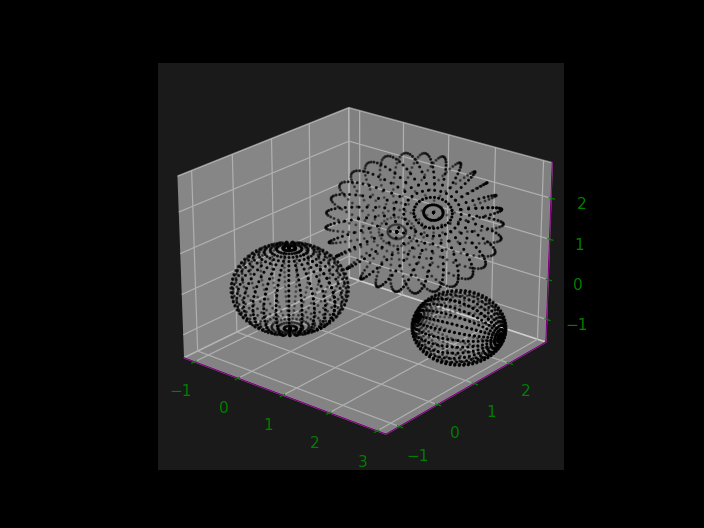

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_circle_coords[:, 0],
           transformed_circle_coords[:, 1],
           transformed_circle_coords[:, 2], s=1, c='black')

ax.scatter(transformed_circle_coords2[:, 0],
           transformed_circle_coords2[:, 1],
           transformed_circle_coords2[:, 2], s=1, c='black')

ax.scatter(circle_coords[:, 0],
           circle_coords[:, 1],
           circle_coords[:, 2], s=1, c='black')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3);